In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option( "display.max_columns", None)


data  = pd.read_csv("vetdataset - vet.csv") 

In [3]:
data.head()

,Monthly_Income_ange,Number_of_Accompanying_Travellers,Length_of_Stay,What_is_your_age,Bank_Statement_Closing_Balance,Occupation_Skilled,Occupation_Unskilled,Employment_Status _Employed,Employment_Status _Self-employed,Employment_Status _Unemployed,Purpose_of_trip_Conference,Purpose_of_trip_Tourism,Invitation_Letter_or _our_Booking_No,Invitation_Letter_or _our_Booking_Yes,Employment letter/Business registration_No,Employment letter/Business registration_Yes,Do_you_have_dependents_Children_in_home_country?_No,Do_you_have_dependents_Children_in_home_country?_Yes,Marital_Status_Married,Marital_Status_Single,Member_of_a_Proffesional_Body _No,Member_of_a_Proffesional_Body _Yes,Assets or Investments in home country_No,Assets or Investments in home country_Yes,Have_you_travelled_within_the_last_5_years?_No,Have_you_travelled_within_the_last_5_years?_Yes,Where_have_you_travelled_to_within_the_last_ten_years?_Tier_1,Where_have_you_travelled_to_within_the_last_ten_years?_Tier_2,Have_you_been_refused_a_visa? _No,Have_you_been_refused_a_visa? _Yes,Previously_broken_immigration_laws_in_foreign_country?,Ever_been_convicted_of_a_Crime_in_home_country?,VISA_APPROVED_OR_DENIED_APPROVED,VISA_APPROVED_OR_DENIED_DENIED
0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1,1,0
1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
2,1,0,1,1,1,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
3,2,0,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0
4,2,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1


In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [71]:
one_hot_encoded = pd.get_dummies(data)

In [72]:
one_hot_encoded

,Monthly_Income_ange,Number_of_Accompanying_Travellers,Length_of_Stay,What_is_your_age,Bank_Statement_Closing_Balance,Occupation_Skilled,Occupation_Unskilled,Employment_Status _Employed,Employment_Status _Self-employed,Employment_Status _Unemployed,Sponsor_Self-sponsor,Purpose_of_trip_Conference,Purpose_of_trip_Tourism,Invitation_Letter_or _our_Booking_No,Invitation_Letter_or _our_Booking_Yes,Employment letter/Business registration_No,Employment letter/Business registration_Yes,Do_you_have_dependents_Children_in_home_country?_No,Do_you_have_dependents_Children_in_home_country?_Yes,Marital_Status_Married,Marital_Status_Single,Member_of_a_Proffesional_Body _No,Member_of_a_Proffesional_Body _Yes,Assets or Investments in home country_No,Assets or Investments in home country_Yes,Have_you_travelled_within_the_last_5_years?_No,Have_you_travelled_within_the_last_5_years?_Yes,Where_have_you_travelled_to_within_the_last_ten_years?_Tier_1,Where_have_you_travelled_to_within_the_last_ten_years?_Tier_2,Have_you_been_refused_a_visa? _No,Have_you_been_refused_a_visa? _Yes,Previously_broken_immigration_laws_in_foreign_country?_overstayed_or_was_deported_No,Ever_been_convicted_of_a_Crime_in_home_country?_No,VISA_APPROVED_OR_DENIED_APPROVED,VISA_APPROVED_OR_DENIED_DENIED
0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1,1,0
1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
2,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
3,2,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,1,0
4,2,3,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1
5,3,0,2,0,2,0,1,0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1
6,4,0,2,1,2,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,0,1


In [73]:
one_hot_encoded.to_csv('vet.csv')

In [74]:
dat  = pd.read_csv('vet.csv', )

In [75]:
dat.drop(columns=['Unnamed: 0'], inplace=True)

In [76]:
dat

,Monthly_Income_ange,Number_of_Accompanying_Travellers,Length_of_Stay,What_is_your_age,Bank_Statement_Closing_Balance,Occupation_Skilled,Occupation_Unskilled,Employment_Status _Employed,Employment_Status _Self-employed,Employment_Status _Unemployed,Sponsor_Self-sponsor,Purpose_of_trip_Conference,Purpose_of_trip_Tourism,Invitation_Letter_or _our_Booking_No,Invitation_Letter_or _our_Booking_Yes,Employment letter/Business registration_No,Employment letter/Business registration_Yes,Do_you_have_dependents_Children_in_home_country?_No,Do_you_have_dependents_Children_in_home_country?_Yes,Marital_Status_Married,Marital_Status_Single,Member_of_a_Proffesional_Body _No,Member_of_a_Proffesional_Body _Yes,Assets or Investments in home country_No,Assets or Investments in home country_Yes,Have_you_travelled_within_the_last_5_years?_No,Have_you_travelled_within_the_last_5_years?_Yes,Where_have_you_travelled_to_within_the_last_ten_years?_Tier_1,Where_have_you_travelled_to_within_the_last_ten_years?_Tier_2,Have_you_been_refused_a_visa? _No,Have_you_been_refused_a_visa? _Yes,Previously_broken_immigration_laws_in_foreign_country?_overstayed_or_was_deported_No,Ever_been_convicted_of_a_Crime_in_home_country?_No,VISA_APPROVED_OR_DENIED_APPROVED,VISA_APPROVED_OR_DENIED_DENIED
0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1,1,0
1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
2,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
3,2,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,1,0
4,2,3,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1
5,3,0,2,0,2,0,1,0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1
6,4,0,2,1,2,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,0,1


In [ ]:
dat.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
X = data.drop('VISA_APPROVED_OR_DENIED_DENIED', axis = 1)
y = data.VISA_APPROVED_OR_DENIED_DENIED

In [6]:
X.shape, y.shape

((7, 33), (7,))

# Univariate Feature Selection

In [7]:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [8]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [10]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                             features     Score
1                   Number_of_Accompanying_Travellers  4.000000
32                   VISA_APPROVED_OR_DENIED_APPROVED  3.000000
22           Assets or Investments in home country_No  2.666667
0                                 Monthly_Income_ange  2.625000
17  Do_you_have_dependents_Children_in_home_countr...  2.250000
25    Have_you_travelled_within_the_last_5_years?_Yes  2.250000
16  Do_you_have_dependents_Children_in_home_countr...  1.687500
24     Have_you_travelled_within_the_last_5_years?_No  1.687500
27  Where_have_you_travelled_to_within_the_last_te...  1.500000
6                                Occupation_Unskilled  1.333333


In [11]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [12]:

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.04738889 0.01272222 0.02425    0.00222222 0.01593056 0.
 0.00270833 0.00291667 0.004375   0.         0.01604167 0.01730556
 0.00097222 0.00715278 0.         0.00666667 0.12856944 0.08986111
 0.00048611 0.01020833 0.00291667 0.006125   0.04872222 0.04415278
 0.08359722 0.10379167 0.00729167 0.04555556 0.00688889 0.02322222
 0.00048611 0.00291667 0.23455556]


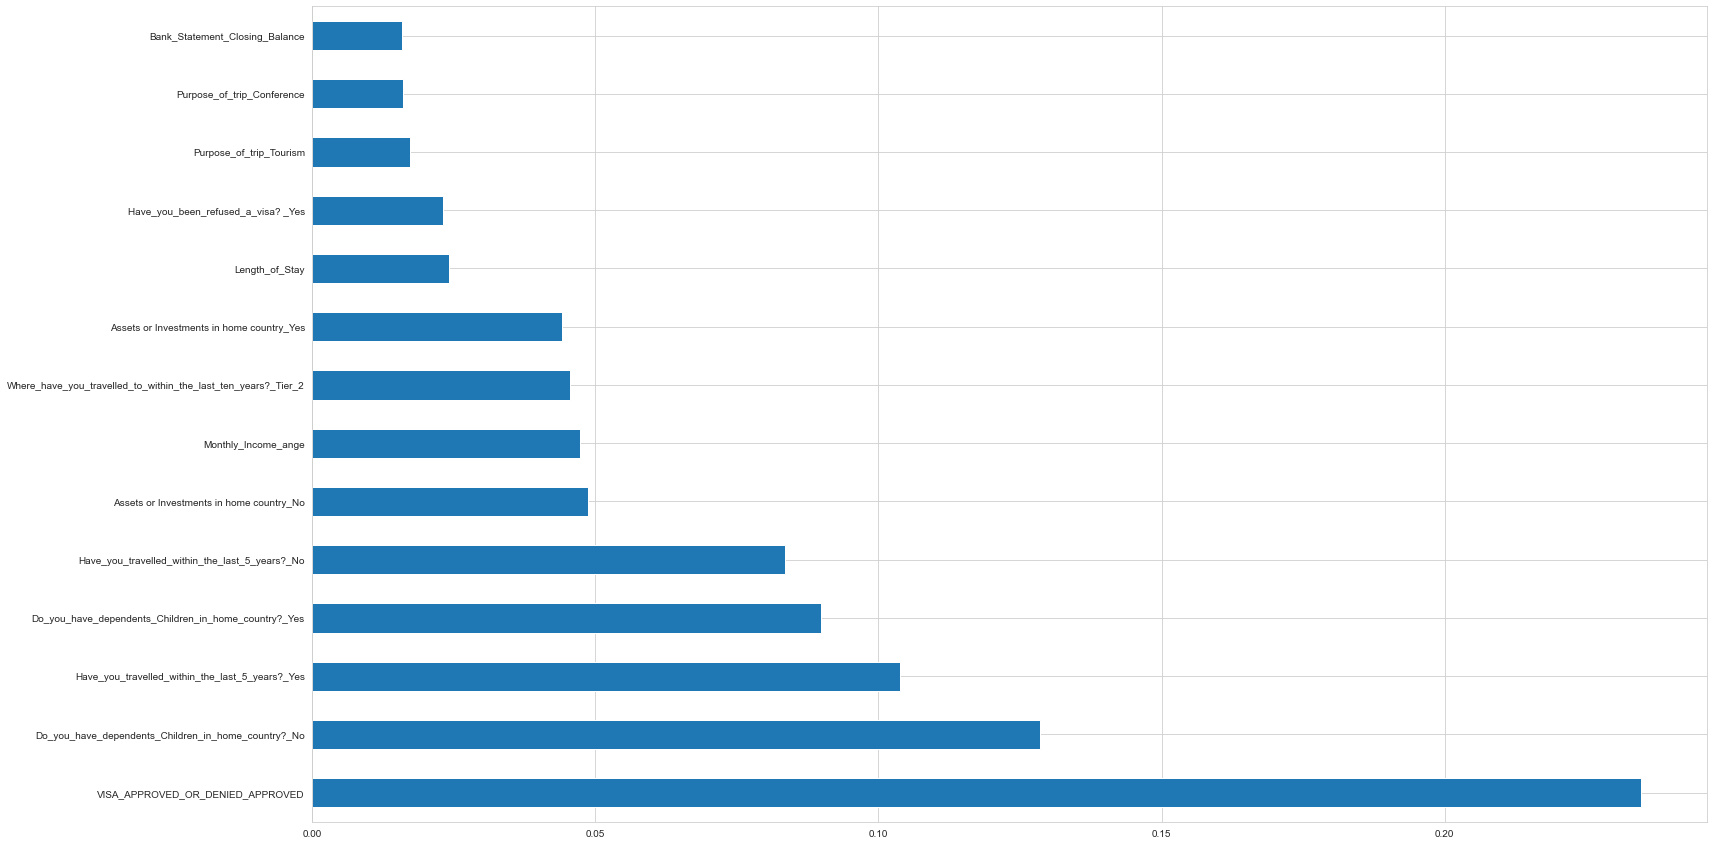

In [13]:
#plot graph of feature importances for better visualization
fig, ax = plt.subplots(figsize=(25,15))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

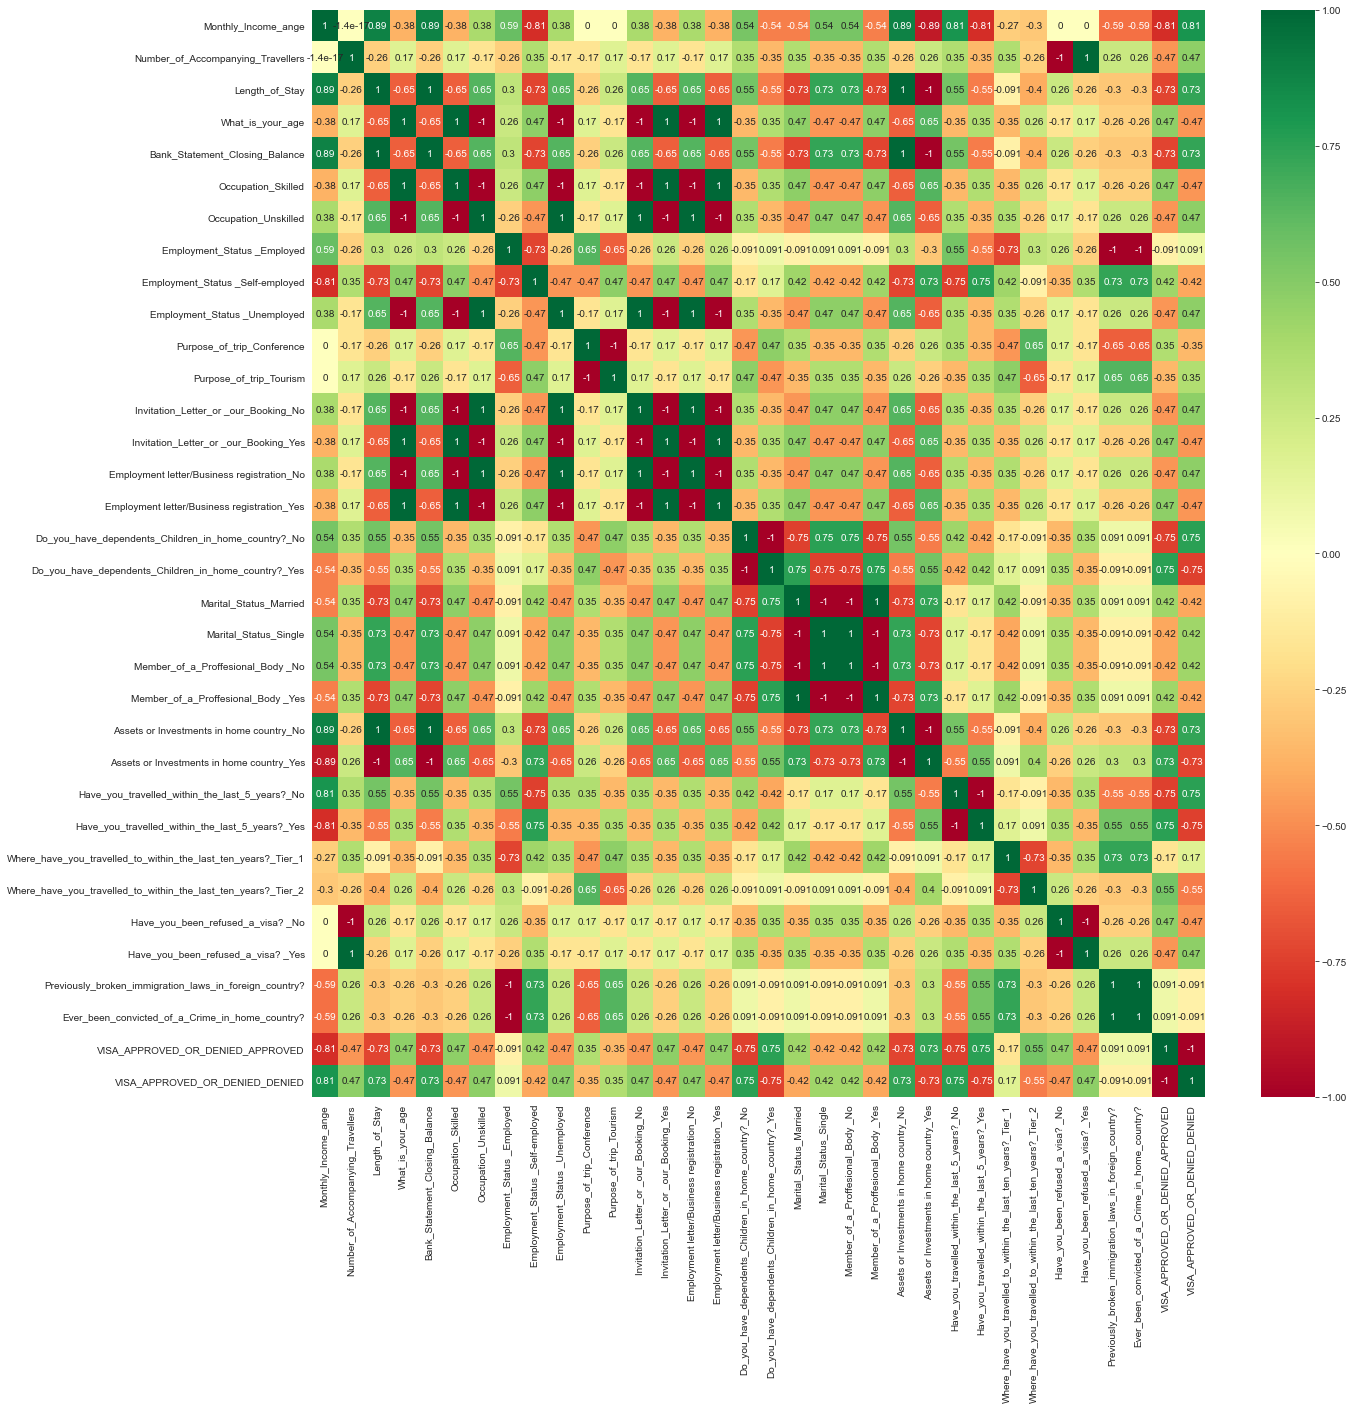

In [15]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index                                    
plt.figure(figsize=(20,20))                                  
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# model prediction

In [17]:

    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = -1
    params["num_leaves"] = 10
    params["min_data_in_leaf"] = 20
    params["learning_rate"] = 0.03
    params["bagging_fraction"] = 0.9
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = 20
    params["bagging_freq"] = 10
    params["bagging_seed"] = 30
    params["'min_child_weight'"] = 0.09
    params["lambda_l1"] = 0.01
    params["verbosity"] = -1
from lightgbm import LGBMClassifier # intializing the model
model = LGBMClassifier(**params)
# fitting the model
model.fit(X_train,y_train)

[LightGBM] [Warning] min_child_weight is set=0.001, min_child_weight=0.09 will be ignored. Current value: min_child_weight=0.001
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LGBMClassifier("'min_child_weight'"=0.09, bagging_fraction=0.9, bagging_freq=10,
               bagging_seed=30, feature_fraction=0.35, feature_fraction_seed=20,
               lambda_l1=0.01, learning_rate=0.03, metric='auc',
               min_data_in_leaf=20, num_leaves=10, objective='binary',
               verbosity=-1)

In [18]:
y_pred = model.predict(X_test)


In [19]:
print("Testing Accuracy :", model.score(X_test, y_test))
print("Training Accuracy :", model.score(X_train,y_train))

Testing Accuracy : 0.0
Training Accuracy : 0.8


In [20]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [21]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)


[[0 0]
 [2 0]]


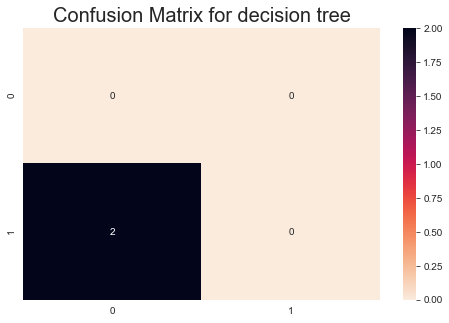

In [22]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for decision tree', fontweight = 30, fontsize = 20)
plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\pythonpy\Anaconda3\envs\tensowflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\pythonpy\Anaconda3\envs\tensowflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\pythonpy\Anaconda3\envs\tensowflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\pythonpy\Anaconda3\en

In [95]:
LGB_y_prob = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(LGB_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model.score(X_test, y_pred)

1.0

In [96]:

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, LGB_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

C:\pythonpy\Anaconda3\envs\tensowflow\lib\site-packages\sklearn\metrics\_ranking.py:941: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
C:\pythonpy\Anaconda3\envs\tensowflow\lib\site-packages\sklearn\metrics\_ranking.py:93: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


nan

because y does not have negative samples, ROC,AUC becomes meaningless. 

Text(0.5, 0, 'False Positive Rate')

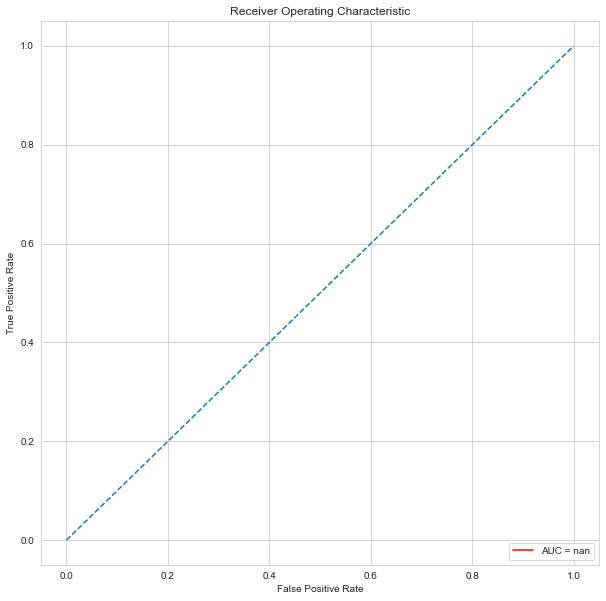

In [97]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')